In [ ]:
!pip install gym
!pip install gym matplotlib


Treinamento concluído!


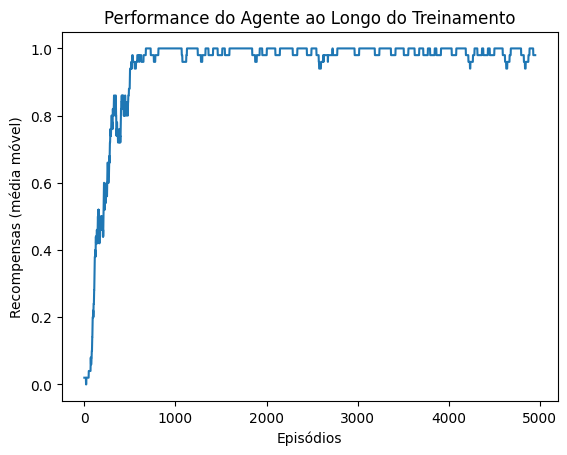


Testando o agente treinado:
['\n\x1bS\x1bFFF\nFHFH\nFFFH\nHFFG\n', '  (Down)\nSFFF\n\x1bF\x1bHFH\nFFFH\nHFFG\n']
['  (Down)\nSFFF\nFHFH\n\x1bF\x1bFFH\nHFFG\n']
['  (Right)\nSFFF\nFHFH\nF\x1bF\x1bFH\nHFFG\n']
['  (Down)\nSFFF\nFHFH\nFFFH\nH\x1bF\x1bFG\n']
['  (Right)\nSFFF\nFHFH\nFFFH\nHF\x1bF\x1bG\n']
['  (Right)\nSFFF\nFHFH\nFFFH\nHFF\x1bG\x1b\n']
Agente venceu!


In [ ]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt

# Criando o ambiente FrozenLake
env = gym.make("FrozenLake-v1", is_slippery=False, render_mode="ansi")  # Render modo ansi para evitar travamentos

# Inicializando variáveis
q_table = np.zeros((env.observation_space.n, env.action_space.n))
learning_rate = 0.8
discount_factor = 0.95
episodes = 5000  # Aumentando o número de episódios
max_steps = 100
epsilon = 1.0  # Começa com alta exploração
epsilon_decay = 0.995  # Reduz epsilon a cada episódio
min_epsilon = 0.01  # Limite inferior para epsilon

# Para visualização
rewards = []

# Função para renderizar o tabuleiro
def render_environment(env):
    print(env.render())

# Treinando o agente com Q-Learning
for episode in range(episodes):
    # Ajuste para diferentes versões do gym
    reset_result = env.reset()
    state = reset_result if isinstance(reset_result, int) else reset_result[0]
    total_reward = 0

    for step in range(max_steps):
        # Escolhendo a ação (Exploração vs Exploração)
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Exploração
        else:
            action = np.argmax(q_table[state, :])  # Exploração (melhor ação até agora)

        # Executando a ação no ambiente
        step_result = env.step(action)
        if len(step_result) == 5:  # Para versões mais recentes
            next_state, reward, done, _, _ = step_result
        else:  # Para versões mais antigas
            next_state, reward, done, _ = step_result

        # Atualizando a Q-table com a fórmula do Q-Learning
        q_table[state, action] = q_table[state, action] + learning_rate * (
            reward + discount_factor * np.max(q_table[next_state, :]) - q_table[state, action]
        )

        # Atualizando o estado e acumulando a recompensa
        state = next_state
        total_reward += reward

        # Se o episódio terminou
        if done:
            break

    # Atualizando o epsilon para reduzir a exploração ao longo do tempo
    epsilon = max(min_epsilon, epsilon * epsilon_decay)
    rewards.append(total_reward)

print("Treinamento concluído!")

# Visualizando a performance do agente
plt.plot(np.convolve(rewards, np.ones(50)/50, mode='valid'))
plt.title("Performance do Agente ao Longo do Treinamento")
plt.xlabel("Episódios")
plt.ylabel("Recompensas (média móvel)")
plt.show()

# Testando o agente treinado
print("\nTestando o agente treinado:")
reset_result = env.reset()
state = reset_result if isinstance(reset_result, int) else reset_result[0]

for step in range(max_steps):
    action = np.argmax(q_table[state, :])  # Melhor ação baseada na Q-table
    step_result = env.step(action)
    if len(step_result) == 5:  # Para versões mais recentes
        next_state, reward, done, _, _ = step_result
    else:  # Para versões mais antigas
        next_state, reward, done, _ = step_result

    render_environment(env)

    if done:
        if reward == 1:
            print("Agente venceu!")
        else:
            print("Agente caiu no buraco!")
        break
    state = next_state
